
## Infinite Series Notebook

In [1]:
from wav_table import *
from freq_table import *

In [2]:
 #first lets call the digits of pi
digits_of_pi(5000)

1157 digits of pi:
 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927

In [3]:
pi

3.14

In [4]:
pi_hz_octave

{-3: 3.14,
 -2: 6.28,
 -1: 12.56,
 0: 25.12,
 1: 50.24,
 2: 100.48,
 3: 200.96,
 4: 401.92,
 5: 803.84,
 6: 1607.68,
 7: 3215.36,
 8: 6430.72}

In [5]:
pi_hz = Hz(3.14, length=range(0,900))

In [6]:
pi_overtone_series = pi_hz.make_overtone_series()
pi_overtone_series

[0.0,
 3.14,
 6.28,
 9.42,
 12.56,
 15.700000000000001,
 18.84,
 21.98,
 25.12,
 28.26,
 31.400000000000002,
 34.54,
 37.68,
 40.82,
 43.96,
 47.1,
 50.24,
 53.38,
 56.52,
 59.660000000000004,
 62.800000000000004,
 65.94,
 69.08,
 72.22,
 75.36,
 78.5,
 81.64,
 84.78,
 87.92,
 91.06,
 94.2,
 97.34,
 100.48,
 103.62,
 106.76,
 109.9,
 113.04,
 116.18,
 119.32000000000001,
 122.46000000000001,
 125.60000000000001,
 128.74,
 131.88,
 135.02,
 138.16,
 141.3,
 144.44,
 147.58,
 150.72,
 153.86,
 157.0,
 160.14000000000001,
 163.28,
 166.42000000000002,
 169.56,
 172.70000000000002,
 175.84,
 178.98000000000002,
 182.12,
 185.26000000000002,
 188.4,
 191.54000000000002,
 194.68,
 197.82000000000002,
 200.96,
 204.1,
 207.24,
 210.38,
 213.52,
 216.66,
 219.8,
 222.94,
 226.08,
 229.22,
 232.36,
 235.5,
 238.64000000000001,
 241.78,
 244.92000000000002,
 248.06,
 251.20000000000002,
 254.34,
 257.48,
 260.62,
 263.76,
 266.90000000000003,
 270.04,
 273.18,
 276.32,
 279.46000000000004,
 282.

In [7]:
closest_pitchname_list = []
for i in pi_overtone_series[1:]:
    closest_pitchname_list.append(closest_pitch(i))
closest_pitchname_list

['G-3',
 'G-2',
 'D-1',
 'G-1',
 'B-1',
 'D0',
 'F0',
 'G0',
 'A0',
 'B0',
 'C#1',
 'D1',
 'E1',
 'F1',
 'F#1',
 'G1',
 'G#1',
 'A1',
 'A#1',
 'B1',
 'C2',
 'C#2',
 'D2',
 'D2',
 'D#2',
 'E2',
 'E2',
 'F2',
 'F#2',
 'F#2',
 'G2',
 'G2',
 'G#2',
 'G#2',
 'A2',
 'A2',
 'A#2',
 'A#2',
 'B2',
 'B2',
 'C3',
 'C3',
 'C#3',
 'C#3',
 'C#3',
 'D3',
 'D3',
 'D3',
 'D#3',
 'D#3',
 'E3',
 'E3',
 'E3',
 'E3',
 'F3',
 'F3',
 'F3',
 'F#3',
 'F#3',
 'F#3',
 'G3',
 'G3',
 'G3',
 'G3',
 'G#3',
 'G#3',
 'G#3',
 'G#3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A#3',
 'A#3',
 'A#3',
 'A#3',
 'B3',
 'B3',
 'B3',
 'B3',
 'C4',
 'C4',
 'C4',
 'C4',
 'C4',
 'C#4',
 'C#4',
 'C#4',
 'C#4',
 'C#4',
 'D4',
 'D4',
 'D4',
 'D4',
 'D4',
 'D4',
 'D#4',
 'D#4',
 'D#4',
 'D#4',
 'D#4',
 'E4',
 'E4',
 'E4',
 'E4',
 'E4',
 'E4',
 'E4',
 'F4',
 'F4',
 'F4',
 'F4',
 'F4',
 'F4',
 'F#4',
 'F#4',
 'F#4',
 'F#4',
 'F#4',
 'F#4',
 'F#4',
 'G4',
 'G4',
 'G4',
 'G4',
 'G4',
 'G4',
 'G4',
 'G#4',
 'G#4',
 'G#4',
 'G#4',
 'G#4',
 'G#4',
 'G#4'

It appears the closet overtone series to the series generated from pi as the starting frequency is G natural overtone series.

This would mean that pi expressed as frequencies is closet to G major. But lets look at how far away it is

In [8]:
pitch_to_frequency.get('G')

{0: 24.5,
 1: 49.0,
 2: 98.0,
 3: 196.0,
 4: 392.0,
 5: 783.99,
 6: 1567.98,
 7: 3135.95,
 8: 6271.93}

In [9]:
pi_hz_octave

{-3: 3.14,
 -2: 6.28,
 -1: 12.56,
 0: 25.12,
 1: 50.24,
 2: 100.48,
 3: 200.96,
 4: 401.92,
 5: 803.84,
 6: 1607.68,
 7: 3215.36,
 8: 6430.72}

In [10]:
octave_0_diff = pi_hz_octave[0] - pitch_to_frequency.get('G')[0]
print('In ocatve 0 pi is ' + str(octave_0_diff) + ' cents sharp of G')

In ocatve 0 pi is 0.620000000000001 cents sharp of G


In [11]:
octave_8_diff = pi_hz_octave[8] - pitch_to_frequency.get('G')[8]
print('In ocatve 8 pi is ' + str(octave_8_diff) + ' cents sharp of G')

In ocatve 8 pi is 158.78999999999996 cents sharp of G


## Turning PI into Raw Signal

In [12]:
# using on digit from pi_overtone_series to generate a signal
pi_raw = Raw_Signal(sampling_rate=pi_overtone_series[80],
                    freq=pi_overtone_series[1], 
                    samples=pi_overtone_series[40],
                    generate='on', 
                    graph='on')


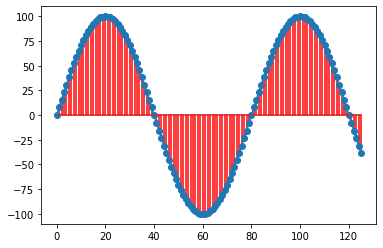

In [13]:
pi_raw.make_sine_wav()

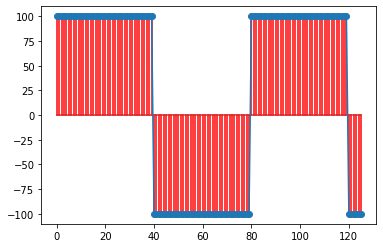

In [48]:
pi_raw.make_square_wav()

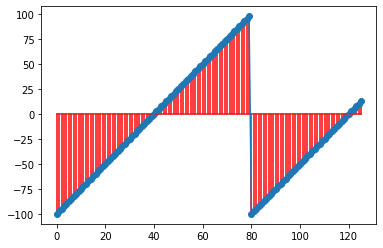

In [49]:
pi_raw.make_sawtooth_wav()

Now lets turn the pi into an wav signal and then choose 16 harmonics from a octave that our ears can hear. pi, it self will not be audible.

In [14]:
closest_pitchname_list[0:16]

['G-3',
 'G-2',
 'D-1',
 'G-1',
 'B-1',
 'D0',
 'F0',
 'G0',
 'A0',
 'B0',
 'C#1',
 'D1',
 'E1',
 'F1',
 'F#1',
 'G1']

In [15]:
pi_overtone_series[1:17]

[3.14,
 6.28,
 9.42,
 12.56,
 15.700000000000001,
 18.84,
 21.98,
 25.12,
 28.26,
 31.400000000000002,
 34.54,
 37.68,
 40.82,
 43.96,
 47.1,
 50.24]

In [16]:
pi_tones = pi_hz.transpose_hz(wav_list=pi_overtone_series[1:17],
                           transposition_amnt=2,
                           direction='up octaves')
pi_tones

[9.8596,
 39.4384,
 88.7364,
 157.7536,
 246.49000000000004,
 354.9456,
 483.1204,
 631.0144,
 798.6276000000001,
 985.9600000000002,
 1193.0116,
 1419.7824,
 1666.2724,
 1932.4816,
 2218.4100000000003,
 2524.0576]

In [17]:
pi_wav_objs = {}
for i,hz in enumerate(pi_tones):
    pi_wav_objs[i] = Wav_Signal(carrier_hz=hz)

In [18]:
# now we have 16 wav_signal objects using frequences from pi's harmoninc series
pi_wav_objs

{0: <wav_table.Wav_Signal at 0x1c21155b00>,
 1: <wav_table.Wav_Signal at 0x1c211557b8>,
 2: <wav_table.Wav_Signal at 0x1c21155940>,
 3: <wav_table.Wav_Signal at 0x1c21155278>,
 4: <wav_table.Wav_Signal at 0x1c211555f8>,
 5: <wav_table.Wav_Signal at 0x1c21155320>,
 6: <wav_table.Wav_Signal at 0x1c21155e80>,
 7: <wav_table.Wav_Signal at 0x1c211551d0>,
 8: <wav_table.Wav_Signal at 0x1c21155c50>,
 9: <wav_table.Wav_Signal at 0x1c21155518>,
 10: <wav_table.Wav_Signal at 0x1c21155208>,
 11: <wav_table.Wav_Signal at 0x1c21155ef0>,
 12: <wav_table.Wav_Signal at 0x1c21155588>,
 13: <wav_table.Wav_Signal at 0x1c21155f60>,
 14: <wav_table.Wav_Signal at 0x1c211552e8>,
 15: <wav_table.Wav_Signal at 0x1c21155a20>}

In [22]:
# but lets make sure to add pi in there as well
pi_wav = Wav_Signal(carrier_hz=pi)

In [26]:
pi_wav.make_simple_wav('sine')

In [30]:
# we can see that simple_3.14_sin.wav is made
ls wav_files

horizontal_connect.wav              simple_440.0_sawtooth.wav
mod_440.0_saw.wav                   simple_440.0_sin.wav
mod_440.0_sin.wav                   simple_440.0_square.wav
mod_440.0_sq.wav                    simple_440.0_square_duty_cycle.wav
mod_440.0_sq_duty_cycle.wav         simple_sawtooth.wav
mod_saw.wav                         simple_sin.wav
mod_sin.wav                         simple_square.wav
mod_sq.wav                          sounds.wav
new_wav.wav                         vertical_stack.wav
simple_3.14_sin.wav


In [31]:
# lets make each type of wav for the pi frequencey
pi_wav.make_simple_wav('square')
pi_wav.make_simple_wav('square_duty')
pi_wav.make_simple_wav('sawtooth')
pi_wav.make_mod_wav('sine')
pi_wav.make_mod_wav('square')
pi_wav.make_mod_wav('square_duty')
pi_wav.make_mod_wav('sawtooth')

In [32]:
# we now have a pi_wav for each type of wav available
ls wav_files

horizontal_connect.wav              simple_3.14_sawtooth.wav
mod_3.14_saw.wav                    simple_3.14_sin.wav
mod_3.14_sin.wav                    simple_3.14_square.wav
mod_3.14_sq.wav                     simple_3.14_square_duty_cycle.wav
mod_3.14_sq_duty_cycle.wav          simple_440.0_sawtooth.wav
mod_440.0_saw.wav                   simple_440.0_sin.wav
mod_440.0_sin.wav                   simple_440.0_square.wav
mod_440.0_sq.wav                    simple_440.0_square_duty_cycle.wav
mod_440.0_sq_duty_cycle.wav         simple_sawtooth.wav
mod_saw.wav                         simple_sin.wav
mod_sin.wav                         simple_square.wav
mod_sq.wav                          sounds.wav
new_wav.wav                         vertical_stack.wav


In [42]:
# lets vertically layer all the pi_wav
pi_wav_simple_list = ['wav_files/simple_3.14_sin.wav',
                      'wav_files/simple_3.14_square.wav',
                      'wav_files/simple_3.14_square_duty_cycle.wav',
                      'wav_files/simple_3.14_sawtooth.wav']
pi_all_wav_list = ['wav_files/simple_3.14_sin.wav',
                    'wav_files/simple_3.14_square.wav',
                    'wav_files/simple_3.14_square_duty_cycle.wav',
                    'wav_files/simple_3.14_sawtooth.wav',
                    'wav_files/mod_3.14_sin.wav',
                    'wav_files/mod_3.14_sq.wav',
                    'wav_files/mod_3.14_sq_duty_cycle.wav',
                    'wav_files/mod_3.14_saw.wav']
out_simple_wav = 'stacked_3.14_simple.wav'
out_all_wav = 'stacked_3.14_all.wav'

In [43]:
stack_wav(pi_wav_simple_list, out_simple_wav)
stack_wav(pi_all_wav_list, out_all_wav)

In [44]:
# we now have two stacked pi wav that has mutliple types of waves stacked 
# this is a timbre stacking
ls wav_files

horizontal_connect.wav              simple_3.14_sin.wav
mod_3.14_saw.wav                    simple_3.14_square.wav
mod_3.14_sin.wav                    simple_3.14_square_duty_cycle.wav
mod_3.14_sq.wav                     simple_440.0_sawtooth.wav
mod_3.14_sq_duty_cycle.wav          simple_440.0_sin.wav
mod_440.0_saw.wav                   simple_440.0_square.wav
mod_440.0_sin.wav                   simple_440.0_square_duty_cycle.wav
mod_440.0_sq.wav                    simple_sawtooth.wav
mod_440.0_sq_duty_cycle.wav         simple_sin.wav
mod_saw.wav                         simple_square.wav
mod_sin.wav                         sounds.wav
mod_sq.wav                          stacked_3.14_all.wav
new_wav.wav                         stacked_3.14_simple.wav
simple_3.14_sawtooth.wav            vertical_stack.wav


In [45]:
out_simple_connect = 'connected_3.14_simple.wav'
out_all_connect = 'connected_3.14_all.wav'

In [46]:
concat_wav(pi_wav_simple_list, out_simple_connect)
concat_wav(pi_all_wav_list, out_all_connect)

In [47]:
# we now have two connected pi wav that has multiple types of waves connected
# this is a timbre thread - also known as a color progression
ls wav_files

connected_3.14_all.wav              simple_3.14_sawtooth.wav
connected_3.14_simple.wav           simple_3.14_sin.wav
horizontal_connect.wav              simple_3.14_square.wav
mod_3.14_saw.wav                    simple_3.14_square_duty_cycle.wav
mod_3.14_sin.wav                    simple_440.0_sawtooth.wav
mod_3.14_sq.wav                     simple_440.0_sin.wav
mod_3.14_sq_duty_cycle.wav          simple_440.0_square.wav
mod_440.0_saw.wav                   simple_440.0_square_duty_cycle.wav
mod_440.0_sin.wav                   simple_sawtooth.wav
mod_440.0_sq.wav                    simple_sin.wav
mod_440.0_sq_duty_cycle.wav         simple_square.wav
mod_saw.wav                         sounds.wav
mod_sin.wav                         stacked_3.14_all.wav
mod_sq.wav                          stacked_3.14_simple.wav
new_wav.wav                         vertical_stack.wav


## Lets look at the Pi_Wav_Objs dictionary of pi harmonics

In [68]:
pi_wav_objs.get(0).carrier_hz

9.8596

In [71]:
for k,v in pi_wav_objs.items():
    v.make_simple_wav('sine')
    v.make_simple_wav('sqaure')
    v.make_simple_wav('square_duty')
    v.make_simple_wav('sawtooth')
    v.make_mod_wav('sine')
    v.make_mod_wav('square')
    v.make_mod_wav('square_duty')
    v.make_mod_wav('sawtooth')

In [72]:
ls wav_files

connected_3.14_all.wav
connected_3.14_simple.wav
horizontal_connect.wav
mod_1193.0116_saw.wav
mod_1193.0116_sin.wav
mod_1193.0116_sq.wav
mod_1193.0116_sq_duty_cycle.wav
mod_1419.7824_saw.wav
mod_1419.7824_sin.wav
mod_1419.7824_sq.wav
mod_1419.7824_sq_duty_cycle.wav
mod_157.7536_saw.wav
mod_157.7536_sin.wav
mod_157.7536_sq.wav
mod_157.7536_sq_duty_cycle.wav
mod_1666.2724_saw.wav
mod_1666.2724_sin.wav
mod_1666.2724_sq.wav
mod_1666.2724_sq_duty_cycle.wav
mod_1932.4816_saw.wav
mod_1932.4816_sin.wav
mod_1932.4816_sq.wav
mod_1932.4816_sq_duty_cycle.wav
mod_2218.4100000000003_saw.wav
mod_2218.4100000000003_sin.wav
mod_2218.4100000000003_sq.wav
mod_2218.4100000000003_sq_duty_cycle.wav
mod_246.49000000000004_saw.wav
mod_246.49000000000004_sin.wav
mod_246.49000000000004_sq.wav
mod_246.49000000000004_sq_duty_cycle.wav
mod_2524.0576_saw.wav
mod_2524.0576_sin.wav
mod_2524.0576_sq.wav
mod_2524.0576_sq_duty_cycle.wav
mod_3.14_saw.wav
mod_3.14_sin.wav
mod_3.14_sq.wav
mod_3.14_sq_duty_cycle.wav
mod_354

In [156]:
pwd

'/Volumes/S190813/Coding/wav_utilities/wav_utilities'

In [187]:
import glob
pi_wavs = glob.glob('wav_files/simple*wav')
del pi_wavs[-3:]

In [188]:
pi_wavs

['wav_files/simple_1193.0116_sawtooth.wav',
 'wav_files/simple_1193.0116_sin.wav',
 'wav_files/simple_1193.0116_square_duty_cycle.wav',
 'wav_files/simple_1419.7824_sawtooth.wav',
 'wav_files/simple_1419.7824_sin.wav',
 'wav_files/simple_1419.7824_square_duty_cycle.wav',
 'wav_files/simple_157.7536_sawtooth.wav',
 'wav_files/simple_157.7536_sin.wav',
 'wav_files/simple_157.7536_square_duty_cycle.wav',
 'wav_files/simple_1666.2724_sawtooth.wav',
 'wav_files/simple_1666.2724_sin.wav',
 'wav_files/simple_1666.2724_square_duty_cycle.wav',
 'wav_files/simple_1932.4816_sawtooth.wav',
 'wav_files/simple_1932.4816_sin.wav',
 'wav_files/simple_1932.4816_square_duty_cycle.wav',
 'wav_files/simple_2218.4100000000003_sawtooth.wav',
 'wav_files/simple_2218.4100000000003_sin.wav',
 'wav_files/simple_2218.4100000000003_square_duty_cycle.wav',
 'wav_files/simple_246.49000000000004_sawtooth.wav',
 'wav_files/simple_246.49000000000004_sin.wav',
 'wav_files/simple_246.49000000000004_square_duty_cycle.wav

In [189]:
pi_wavs_ = glob.glob('wav_files/mod*.wav')
del pi_wavs_[-3:]

In [190]:
pi_wavs_

['wav_files/mod_1193.0116_saw.wav',
 'wav_files/mod_1193.0116_sin.wav',
 'wav_files/mod_1193.0116_sq.wav',
 'wav_files/mod_1193.0116_sq_duty_cycle.wav',
 'wav_files/mod_1419.7824_saw.wav',
 'wav_files/mod_1419.7824_sin.wav',
 'wav_files/mod_1419.7824_sq.wav',
 'wav_files/mod_1419.7824_sq_duty_cycle.wav',
 'wav_files/mod_157.7536_saw.wav',
 'wav_files/mod_157.7536_sin.wav',
 'wav_files/mod_157.7536_sq.wav',
 'wav_files/mod_157.7536_sq_duty_cycle.wav',
 'wav_files/mod_1666.2724_saw.wav',
 'wav_files/mod_1666.2724_sin.wav',
 'wav_files/mod_1666.2724_sq.wav',
 'wav_files/mod_1666.2724_sq_duty_cycle.wav',
 'wav_files/mod_1932.4816_saw.wav',
 'wav_files/mod_1932.4816_sin.wav',
 'wav_files/mod_1932.4816_sq.wav',
 'wav_files/mod_1932.4816_sq_duty_cycle.wav',
 'wav_files/mod_2218.4100000000003_saw.wav',
 'wav_files/mod_2218.4100000000003_sin.wav',
 'wav_files/mod_2218.4100000000003_sq.wav',
 'wav_files/mod_2218.4100000000003_sq_duty_cycle.wav',
 'wav_files/mod_246.49000000000004_saw.wav',
 'wav

In [191]:
pi_wavs.extend(pi_wavs_)

In [192]:
pi_wavs

['wav_files/simple_1193.0116_sawtooth.wav',
 'wav_files/simple_1193.0116_sin.wav',
 'wav_files/simple_1193.0116_square_duty_cycle.wav',
 'wav_files/simple_1419.7824_sawtooth.wav',
 'wav_files/simple_1419.7824_sin.wav',
 'wav_files/simple_1419.7824_square_duty_cycle.wav',
 'wav_files/simple_157.7536_sawtooth.wav',
 'wav_files/simple_157.7536_sin.wav',
 'wav_files/simple_157.7536_square_duty_cycle.wav',
 'wav_files/simple_1666.2724_sawtooth.wav',
 'wav_files/simple_1666.2724_sin.wav',
 'wav_files/simple_1666.2724_square_duty_cycle.wav',
 'wav_files/simple_1932.4816_sawtooth.wav',
 'wav_files/simple_1932.4816_sin.wav',
 'wav_files/simple_1932.4816_square_duty_cycle.wav',
 'wav_files/simple_2218.4100000000003_sawtooth.wav',
 'wav_files/simple_2218.4100000000003_sin.wav',
 'wav_files/simple_2218.4100000000003_square_duty_cycle.wav',
 'wav_files/simple_246.49000000000004_sawtooth.wav',
 'wav_files/simple_246.49000000000004_sin.wav',
 'wav_files/simple_246.49000000000004_square_duty_cycle.wav

In [194]:
pi_pairs = list()
while(pi_wavs):
    a = pi_wavs.pop(0); b = pi_wavs.pop(0)
    pi_pairs.append((a,b))
 
print(pi_pairs)

[('wav_files/simple_1193.0116_sawtooth.wav', 'wav_files/simple_1193.0116_sin.wav'), ('wav_files/simple_1193.0116_square_duty_cycle.wav', 'wav_files/simple_1419.7824_sawtooth.wav'), ('wav_files/simple_1419.7824_sin.wav', 'wav_files/simple_1419.7824_square_duty_cycle.wav'), ('wav_files/simple_157.7536_sawtooth.wav', 'wav_files/simple_157.7536_sin.wav'), ('wav_files/simple_157.7536_square_duty_cycle.wav', 'wav_files/simple_1666.2724_sawtooth.wav'), ('wav_files/simple_1666.2724_sin.wav', 'wav_files/simple_1666.2724_square_duty_cycle.wav'), ('wav_files/simple_1932.4816_sawtooth.wav', 'wav_files/simple_1932.4816_sin.wav'), ('wav_files/simple_1932.4816_square_duty_cycle.wav', 'wav_files/simple_2218.4100000000003_sawtooth.wav'), ('wav_files/simple_2218.4100000000003_sin.wav', 'wav_files/simple_2218.4100000000003_square_duty_cycle.wav'), ('wav_files/simple_246.49000000000004_sawtooth.wav', 'wav_files/simple_246.49000000000004_sin.wav'), ('wav_files/simple_246.49000000000004_square_duty_cycle.wa

In [207]:
count = 0
for pair in pi_pairs:
    stack_wav(pair, 'pair_{}.wav'.format(count))
    count += 1

In [209]:
s_fname = 'quad_pairs'
stack_layers('wav_files/pair*.wav', s_fname)

In [ ]:
count = 0
for pair in pi_pairs:
    concat_wav(pair, 'conn_pair_{}.wav'.format(count))
    count += 1

In [ ]:
c_fname = 'conn_quad'
concat_layers('wav_files/conn_pair*.wav', c_fname)